In [35]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')
X = news.data
Y = news.target

In [15]:
print("Количество новостей = {}".format(len(X)))

Количество новостей = 18846


In [19]:
print("Количество меток новостей = {}".format(len(Y)))
print("Количество классов: {}".format(len(np.bincount(Y))))

Количество меток новостей = 18846
Количество классов: 20


In [20]:
print(X[1])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   



In [121]:
Y[1]

3

# Отбираю 4 самые популярные новости

In [57]:
np.bincount(Y)

array([799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984,
       990, 987, 997, 910, 940, 775, 628], dtype=int64)

In [40]:
df = pd.DataFrame(Y, columns = ['Y'])
df['X'] = X
df

,Y,X
0,10,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...
1,3,From: mblawson@midway.ecn.uoknor.edu (Matthew ...
2,17,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...
3,3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...
4,4,From: Alexander Samuel McDiarmid <am2o+@andrew...
...,...,...
18841,13,From: jim.zisfein@factory.com (Jim Zisfein) \n...
18842,12,From: rdell@cbnewsf.cb.att.com (richard.b.dell...
18843,3,From: westes@netcom.com (Will Estes)\nSubject:...
18844,1,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [53]:
sp = df['Y'].value_counts(sort = True)[:4]
sp.index

Int64Index([10, 15, 8, 9], dtype='int64')

In [56]:
df_4 = df[(df['Y'] == sp.index[0]) | (df['Y'] == sp.index[1]) | (df['Y'] == sp.index[2]) | (df['Y'] == sp.index[3])]
df_4

,Y,X
0,10,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...
7,10,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...
8,10,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...
19,8,From: mjs@sys.uea.ac.uk (Mike Sixsmith)\nSubje...
23,8,From: jlevine@rd.hydro.on.ca (Jody Levine)\nSu...
...,...,...
18828,10,From: LMARSHA@cms.cc.wayne.edu (Laurie Marshal...
18830,9,From: pkeenan@s.psych.uiuc.edu (Patricia Keena...
18832,15,From: aa888@freenet.carleton.ca (Mark Baker)\n...
18837,10,Organization: Queen's University at Kingston\n...


In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(df['X']), df['Y'], test_size=0.25, random_state=17)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
cv = CountVectorizer()
cv.fit(x_train)
x_train = cv.transform(x_train)
x_test = cv.transform(x_test)

In [74]:
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

In [75]:
model_svm = svm.SVC(kernel='linear', C=1.0, probability = True)
model_svm.fit(x_train, y_train)
predictions = model_svm.predict(x_test)

In [76]:
accuracy_score(y_test, predictions)

0.8438030560271647

In [77]:
precision_score(y_test, predictions, average='micro')

0.8438030560271647

In [78]:
recall_score(y_test, predictions, average='micro')

0.8438030560271647

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       190
           1       0.69      0.78      0.73       246
           2       0.82      0.84      0.83       237
           3       0.73      0.71      0.72       263
           4       0.80      0.82      0.81       220
           5       0.79      0.80      0.79       237
           6       0.80      0.82      0.81       260
           7       0.84      0.83      0.84       248
           8       0.92      0.88      0.90       246
           9       0.92      0.88      0.90       265
          10       0.94      0.91      0.93       253
          11       0.92      0.89      0.91       257
          12       0.75      0.80      0.77       236
          13       0.83      0.84      0.84       227
          14       0.96      0.89      0.92       270
          15       0.88      0.93      0.91       242
          16       0.87      0.88      0.87       231
          17       0.93    

# Метод опорных векторов показал хорошие результаты при обучении. Данный вывод можно сделать исходя из применненых метрик

# Логистическая регрессия

In [86]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(x_train, y_train)

LogisticRegression(n_jobs=-1, random_state=7)

In [87]:
round(logit.score(x_train, y_train), 3),round(logit.score(x_test, y_test), 3)

(0.999, 0.875)

In [88]:
predict_logist = logit.predict(x_test)
accuracy_score(y_test, predict_logist)

0.8754244482173175

In [89]:
precision_score(y_test, predict_logist, average='micro')

0.8754244482173175

In [90]:
recall_score(y_test, predict_logist, average='micro')

0.8754244482173175

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_logist))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       190
           1       0.76      0.81      0.78       246
           2       0.84      0.83      0.84       237
           3       0.79      0.73      0.76       263
           4       0.84      0.86      0.85       220
           5       0.80      0.84      0.82       237
           6       0.85      0.86      0.86       260
           7       0.87      0.89      0.88       248
           8       0.93      0.91      0.92       246
           9       0.92      0.91      0.92       265
          10       0.97      0.93      0.95       253
          11       0.95      0.92      0.93       257
          12       0.80      0.86      0.83       236
          13       0.90      0.93      0.92       227
          14       0.95      0.93      0.94       270
          15       0.87      0.96      0.91       242
          16       0.92      0.90      0.91       231
          17       0.94    

# На мой взгляд, Логистичекая модель неожиданно превзошла метод опорных векторов. Качество рассмотренных метрик пусть и ненамного, но лучше на 0,03, чем у метода опорных векторов. Однако обе модели остаются применимыми. Далее рассмотрим для примера KNN и DT 

# KNN and DT

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [95]:
%%time
model_knn = KNeighborsClassifier(n_neighbors=10) #Задаем количество соседий на угад
knn_params = {'n_neighbors': list(range(3, 11))}
model_knn_grid = GridSearchCV(model_knn, knn_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = False)
model_knn_grid.fit(x_train, y_train)
knn_pred = model_knn_grid.predict(x_test)

print("Лучшее качество обучение = {}".format(model_knn_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_knn_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_knn_grid.score(x_train, y_train)))
print("RMSE = {}".format(mean_squared_error(y_test, knn_pred, squared = False)))

Лучшее качество обучение = 0.4820288437924563
Оптимальное количество соседей = {'n_neighbors': 3}
Качество обучения на тренировочных данных R^2 = 0.7753643696052073
RMSE = 5.497896649824931
Wall time: 2min 37s


In [98]:
model_knn_grid.best_score_

0.4820288437924563

In [103]:
print("Метрика достоверности предсказания = {}".format(accuracy_score(y_test, knn_pred)))

Метрика достоверности предсказания = 0.5093378607809848


In [104]:
%%time
model_tree = DecisionTreeClassifier(max_depth=15, random_state=17) #Задаем количество соседий на угад
tree_params = {'max_depth': np.arange(1, 15)}

model_tree_grid = GridSearchCV(model_tree, tree_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = True)

model_tree_grid.fit(x_train, y_train)
tree_pred = model_tree_grid.predict(x_test)

print("Лучшее качество обучение = {}".format(model_tree_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_tree_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_tree_grid.score(x_train, y_train)))
print("RMSE = {}".format(mean_squared_error(y_test, tree_pred, squared = False)))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.3min finished


Лучшее качество обучение = 0.3744154224091769
Оптимальное количество соседей = {'max_depth': 14}
Качество обучения на тренировочных данных R^2 = 0.4184944106410075
RMSE = 5.945404554283223
Wall time: 2min 24s


In [105]:
print("Метрика достоверности предсказания = {}".format(accuracy_score(y_test, tree_pred)))

Метрика достоверности предсказания = 0.3790322580645161


# Исходя из результатов метрики предсказания модели на основе k-ближайших соседий и деревьев решений можно сразу отбросить, так как данные модели не качественно предсказывают класс новостей

# Кривые обучения

# KNN

In [114]:
from sklearn.model_selection import learning_curve
newsgroups = fetch_20newsgroups(subset='all',
remove=('headers', 'footers', 'quotes'))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), X = X, y = y,
                                                        scoring = "accuracy", n_jobs = 1)

In [115]:
train_scores

array([[0.39084273, 0.36894492, 0.36894492, 0.36894492, 0.36894492],
       [0.39783629, 0.42865891, 0.42110635, 0.42110635, 0.42110635],
       [0.4412013 , 0.43444699, 0.43058738, 0.43106983, 0.43106983],
       [0.4521955 , 0.45082599, 0.45502011, 0.45014123, 0.45082599],
       [0.45516052, 0.45834439, 0.45363492, 0.45482887, 0.46245689]])

In [116]:
test_scores

array([[0.1137931 , 0.10772088, 0.12231361, 0.120987  , 0.10135314],
       [0.14880637, 0.15229504, 0.16476519, 0.15707084, 0.14672327],
       [0.17161804, 0.1767047 , 0.1862563 , 0.18015389, 0.16954099],
       [0.19549072, 0.19129743, 0.20058371, 0.19766516, 0.18572566],
       [0.20689655, 0.1992571 , 0.20960467, 0.20615548, 0.19315468]])

In [117]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

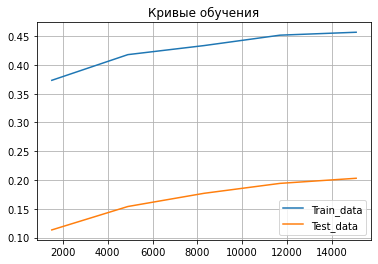

In [119]:
plt.plot(train_sizes, train_mean, label = 'Train_data')
plt.plot(train_sizes, test_mean, label = 'Test_data')
plt.title('Кривые обучения')
plt.legend()
plt.grid(True)